In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 2

@author: yaning
"""

import importlib
import numpy as np
import matplotlib.pyplot as plt

# my own class files
import with_learning.learning_NN.Receptors as Receptors
import with_learning.learning_NN.Network as Network


importlib.reload(Receptors)
importlib.reload(Network)

<module 'with_learning.learning_NN.Network' from '/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Network.py'>

In [52]:
# try use MCMC result params
path = "/home/yaning/Documents/Spiking_NN/without_learning/"
samples = np.load(path + "MCMC_samples/static_std_initial_0.npy")
cut_samples = samples[1000:, :]
values = np.mean(cut_samples, axis=0)
infer_names = Receptors.LigandGatedChannelFactory.infer_names
infer_params = dict(zip(infer_names, values))
Receptors.LigandGatedChannelFactory.infer_params = infer_params

In [53]:
pointCount = 5000
deltaTms = 0.05
times = np.arange(pointCount) * deltaTms
initial_Vm = 1.3458754117369027
# Neuron: deltaTms, I, Vm, fire times

# with learning every group has more neurons 
neuron_input_0 = Network.Neuron(deltaTms, 0, initial_Vm, "input_0")
neuron_input_1 = Network.Neuron(deltaTms, 0, initial_Vm, "input_1")
neuron_input_2 = Network.Neuron(deltaTms, 0, initial_Vm, "input_2")

neuron_excite_main_0 = Network.Neuron(deltaTms, 0, initial_Vm, "excite_main_0")
neuron_excite_main_1 = Network.Neuron(deltaTms, 0, initial_Vm, "excite_main_1")
neuron_excite_sub_0 = Network.Neuron(deltaTms, 0, initial_Vm, "excite_sub_0")
neuron_excite_sub_1 = Network.Neuron(deltaTms, 0, initial_Vm, "excite_sub_1")

neuron_inhibit_main_0 = Network.Neuron(deltaTms, 0, initial_Vm, "inhibit_main_0")
neuron_inhibit_main_1 = Network.Neuron(deltaTms, 0, initial_Vm, "inhibit_main_1")
neuron_inhibit_sub_0 = Network.Neuron(deltaTms, 0, initial_Vm, "inhibit_sub_0")
neuron_inhibit_sub_1 = Network.Neuron(deltaTms, 0, initial_Vm, "inhibit_sub_1")

neuron_output = Network.Neuron(deltaTms, 0, initial_Vm, "output")

neurons = [neuron_input_0, neuron_input_1, neuron_input_2, 
            neuron_excite_main_0, neuron_excite_main_1, 
            neuron_excite_sub_0, neuron_excite_sub_1, 
            neuron_inhibit_main_0, neuron_inhibit_main_1, 
            neuron_inhibit_sub_0, neuron_inhibit_sub_1,
            neuron_output]

neuron_names = ["input_0", "input_1", "input_2",
                "excite_main_0", "excite_main_1", 
                "excite_sub_0", "excite_sub_1",
                "inhibit_main_0", "inhibit_main_1",
                "inhibit_sub_0", "inhibit_sub_1",
                "output"]


# create synapse/connection (send neuron, receive neuron)
control = Network.Control(deltaTms, initial_Vm)



#*********************full layer***************************
# ----------------first input layer------------------------
control.create_synapse(neuron_input_0, neuron_excite_main_0, "AMPA")
control.create_synapse(neuron_input_1, neuron_excite_main_0, "AMPA")
control.create_synapse(neuron_input_2, neuron_excite_main_0, "AMPA")

control.create_synapse(neuron_input_0, neuron_excite_main_1, "AMPA")
control.create_synapse(neuron_input_1, neuron_excite_main_1, "AMPA")
control.create_synapse(neuron_input_2, neuron_excite_main_1, "AMPA")

control.create_synapse(neuron_input_0, neuron_inhibit_main_0, "GABA")
control.create_synapse(neuron_input_1, neuron_inhibit_main_0, "GABA")
control.create_synapse(neuron_input_2, neuron_inhibit_main_0, "GABA")

control.create_synapse(neuron_input_0, neuron_inhibit_main_1, "GABA")
control.create_synapse(neuron_input_1, neuron_inhibit_main_1, "GABA")
control.create_synapse(neuron_input_2, neuron_inhibit_main_1, "GABA")

# ----------------self recurrent layer----------------
control.create_synapse(neuron_excite_main_0, neuron_excite_sub_0, "AMPA+NMDA")
control.create_synapse(neuron_excite_main_0, neuron_excite_sub_1, "AMPA+NMDA")

control.create_synapse(neuron_excite_main_1, neuron_excite_sub_0, "AMPA+NMDA")
control.create_synapse(neuron_excite_main_1, neuron_excite_sub_1, "AMPA+NMDA")

control.create_synapse(neuron_excite_sub_0, neuron_excite_main_0, "AMPA+NMDA")
control.create_synapse(neuron_excite_sub_0, neuron_excite_main_1, "AMPA+NMDA")

control.create_synapse(neuron_excite_sub_1, neuron_excite_main_0, "AMPA+NMDA")
control.create_synapse(neuron_excite_sub_1, neuron_excite_main_1, "AMPA+NMDA")
    

control.create_synapse(neuron_inhibit_main_0, neuron_inhibit_sub_0, "GABA")
control.create_synapse(neuron_inhibit_main_0, neuron_inhibit_sub_1, "GABA")

control.create_synapse(neuron_inhibit_main_1, neuron_inhibit_sub_0, "GABA")
control.create_synapse(neuron_inhibit_main_1, neuron_inhibit_sub_1, "GABA")

control.create_synapse(neuron_inhibit_sub_0, neuron_inhibit_main_0, "GABA")
control.create_synapse(neuron_inhibit_sub_0, neuron_inhibit_main_1, "GABA")

control.create_synapse(neuron_inhibit_sub_1, neuron_inhibit_main_0, "GABA")
control.create_synapse(neuron_inhibit_sub_1, neuron_inhibit_main_1, "GABA")

# --------------between excitatory and inhibitory----------------
control.create_synapse(neuron_excite_main_0, neuron_inhibit_main_0, "AMPA+NMDA")
control.create_synapse(neuron_excite_main_0, neuron_inhibit_main_1, "AMPA+NMDA")

control.create_synapse(neuron_excite_main_1, neuron_inhibit_main_0, "AMPA+NMDA")
control.create_synapse(neuron_excite_main_1, neuron_inhibit_main_1, "AMPA+NMDA")

control.create_synapse(neuron_inhibit_main_0, neuron_excite_main_0, "GABA")
control.create_synapse(neuron_inhibit_main_0, neuron_excite_main_1, "GABA")

control.create_synapse(neuron_inhibit_main_1, neuron_excite_main_0, "GABA")
control.create_synapse(neuron_inhibit_main_1, neuron_excite_main_1, "GABA")

# ----------------output layer----------------------
control.create_synapse(neuron_excite_main_0, neuron_output, "AMPA")
control.create_synapse(neuron_excite_main_1, neuron_output, "AMPA")




# recording arrays
Vm_neuron_output = []
neuron_output_currents = []
neuron_excite_main_0_currents = []
all_currents = []
GABA_gPs = []


In [54]:
# get the input neuron firing patterns
path = "/home/yaning/Documents/Spiking_NN/with_learning/"
input_pattern = np.load(path + "dataset.npy") 
output_pattern = np.load(path + "output.npy")

In [55]:
input_pattern.shape

(10, 3, 5000)

In [56]:
input_pattern = input_pattern[1]

In [57]:
# run
for t in range(pointCount):
    if input_pattern[0,t]:
        neuron_input_0.sending_signal()
        neuron_input_0.fire_tstep.append(t)
        
    if input_pattern[1,t]:
        neuron_input_1.sending_signal()
        neuron_input_1.fire_tstep.append(t)
        
    if input_pattern[2,t]:
        neuron_input_2.sending_signal()
        neuron_input_2.fire_tstep.append(t)


    # update the synapse states then each neuron
    for neuron in neurons[3:]:
        neuron.check_firing(t)
        neuron.update()
        all_currents.append(neuron.I)
        
    # set the synapse states back to 0
    for synapse in control.all_synapses:
        synapse.state = 0


    Vm_neuron_output.append(neuron_excite_main_0.Vm - 70)
    neuron_output_currents.append(neuron_output.I)
    neuron_excite_main_0_currents.append(neuron_excite_main_0.I)

/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Receptors.py:56: RuntimeWarning: overflow encountered in scalar multiply
  I = self.gMax * self.gP *(self.Vm - self.rE)
/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Receptors.py:79: RuntimeWarning: invalid value encountered in scalar divide
  self.m.alpha = .1*((25-self.Vm) / (np.exp((25-self.Vm)/10)-1))
/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Receptors.py:81: RuntimeWarning: invalid value encountered in scalar divide
  self.n.alpha = .01 * ((10-self.Vm) / (np.exp((10-self.Vm)/10)-1))
/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Network.py:56: RuntimeWarning: invalid value encountered in scalar add
  Ireceptors += receptor.current()
/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Receptors.py:56: RuntimeWarning: invalid value encountered in scalar multiply
  I = self.gMax * self.gP *(self.Vm - self.rE)
/home/yaning/Documents/Spiking_NN/with_learning/learning_NN/Rece

In [59]:
# convert the firing array to a True and False array for the animation
firing_array = []
for i in neurons:
    converted = [t in i.fire_tstep for t in range(pointCount)]
    firing_array.append(converted)

firing_array = np.array(firing_array)


np.save(path + 'firing.npy', firing_array)

In [ ]:
# see the weights
for synapse in control.all_synapses:
    for receptor in synapse.receptors:
        print(receptor.w)

In [77]:
max(neuron_output_currents)

1.7498207820992837

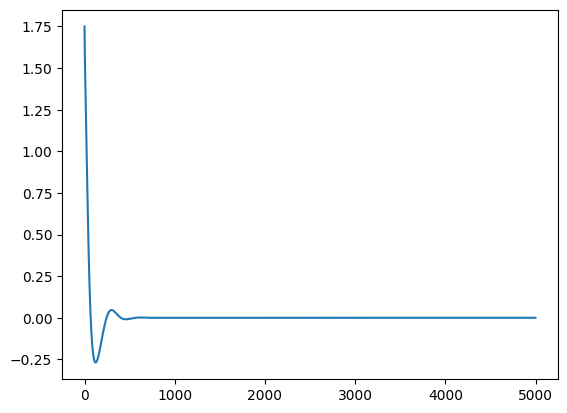

In [76]:
# plt.plot(times, leak_currents, label="leaky")
# plt.plot(times/deltaTms, Ina_currents)
# plt.plot(times/deltaTms, Ik_currents)
# plt.plot(times/deltaTms, Vm_neuron1)
# plt.plot(GABA_gPs)
# plt.plot(Vm_neuron_output)
# plt.plot(neuron_excite_main_0_currents, label="excite_main")
plt.plot(neuron_output_currents, label="output")
# plt.plot(neuron_input_1.fire_tstep)
# plt.plot(times/deltaTms, ampa_currents, label = "ampa")


# plt.xlim(1900, 3250)
# plt.ylim(-10, 20)
# plt.legend()

NameError: name 'Vm_neuron1' is not defined

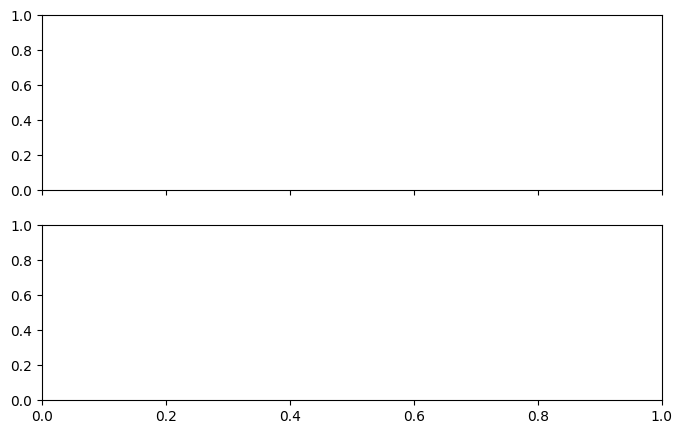

In [71]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 5),
                                gridspec_kw={'height_ratios': [1, 1]})

ax1.plot(times, Vm_neuron1, label = '1')
ax1.plot(times, Vm_neuron2, label = '2')
ax1.set_ylabel("Membrane Potential (mV)")
# ax1.set_title("Hodgkin-Huxley Spiking Neuron Model", fontSize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)

# ax1.set_ylim(0, 1)


ax2.plot(times, I_neuron1, label = '1')
ax2.plot(times, I_neuron2, label = '2')
ax2.set_ylabel("Currents (µA/cm²)")
ax2.set_xlabel("Simulation Time (milliseconds)")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# ax2.set_ylim(-1,1)
# plt.xlim(98, 120)
plt.margins(0, 0.1)
plt.tight_layout()
plt.legend()
plt.show()

# sharp wave ripples